<a href="https://colab.research.google.com/github/subhangi478/To-do-List/blob/main/signlan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow opencv-python matplotlib

import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving numbers.zip to numbers.zip


In [ ]:
import zipfile
with zipfile.ZipFile("numbers.zip", 'r') as zip_ref:
    zip_ref.extractall("asl_data")

In [ ]:
import os
print(os.listdir("asl_data"))


['numbers']


In [ ]:
for root, dirs, files in os.walk('asl_data'):
    print(f"Root: {root}")
    print(f"Dirs: {dirs}")
    print(f"Files: {files[:5]}")
    print("-" * 50)

Root: asl_data
Dirs: ['numbers']
Files: []
--------------------------------------------------
Root: asl_data/numbers
Dirs: ['2', '5', '4', '7', '9', '1', '6', '8', '3', '0']
Files: []
--------------------------------------------------
Root: asl_data/numbers/2
Dirs: []
Files: ['hand1_2_bot_seg_3_cropped.jpeg', 'hand1_2_right_seg_1_cropped.jpeg', 'hand3_2_dif_seg_2_cropped.jpeg', 'hand1_2_right_seg_5_cropped.jpeg', 'hand2_2_bot_seg_5_cropped.jpeg']
--------------------------------------------------
Root: asl_data/numbers/5
Dirs: []
Files: ['hand1_5_dif_seg_2_cropped.jpeg', 'hand2_5_top_seg_2_cropped.jpeg', 'hand2_5_left_seg_1_cropped.jpeg', 'hand1_5_bot_seg_4_cropped.jpeg', 'hand1_5_top_seg_3_cropped.jpeg']
--------------------------------------------------
Root: asl_data/numbers/4
Dirs: []
Files: ['hand4_4_bot_seg_3_cropped.jpeg', 'hand4_4_bot_seg_2_cropped.jpeg', 'hand5_4_bot_seg_3_cropped.jpeg', 'hand5_4_bot_seg_5_cropped.jpeg', 'hand1_4_top_seg_2_cropped.jpeg']
----------------------

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = 'asl_data/numbers/1'

train_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 0 images belonging to 0 classes.


In [ ]:
a_path = os.path.join(base_path, '1')
print(f"\nNumber of images in '1': {len(os.listdir(a_path))}")


Number of images in '1': 70


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'asl_data/numbers'

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 700 images belonging to 10 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
validation_dir = 'asl_data/numbers'

validation_datagen = ImageDataGenerator(rescale=1./255)

val_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(64, 64),batch_size=32,class_mode='categorical')

Found 700 images belonging to 10 classes.


In [ ]:
history = model.fit(train_generator,validation_data=val_generator,epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - accuracy: 0.3665 - loss: 1.8418 - val_accuracy: 0.8400 - val_loss: 0.5064
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 0.8391 - loss: 0.5772 - val_accuracy: 0.9586 - val_loss: 0.1699
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 305ms/step - accuracy: 0.9130 - loss: 0.2761 - val_accuracy: 0.9757 - val_loss: 0.0694
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - accuracy: 0.9509 - loss: 0.1778 - val_accuracy: 0.9914 - val_loss: 0.0352
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.9752 - loss: 0.1117 - val_accuracy: 0.9986 - val_loss: 0.0162
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 356ms/step - accuracy: 0.9819 - loss: 0.0739 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 245ms/step - accuracy: 0.9856 - loss: 0.0611 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - accuracy: 0.9845 - loss: 0.0544 - val_accuracy: 1.0000 - val

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step
Validation Accuracy: 0.08857142857142856
Confusion Matrix:
[[ 7  9  6  3  7  7  8  8  6  9]
 [ 3  8  5 14  6  8  7  8  6  5]
 [14  4  9  5  6  9  7  1  7  8]
 [ 7  8  6  4  8  7  8  8  7  7]
 [ 8  8  4  6  6  3 10  7  9  9]
 [ 6  8  8  9  5  9  8  7  6  4]
 [ 6  5  8  9  7  6  5  7 10  7]
 [ 6  5  6  7  7 12  5  6  6 10]
 [ 7  7  9  6  7  5  8  8  5  8]
 [ 6  8  9  7 11  4  4 10  8  3]]


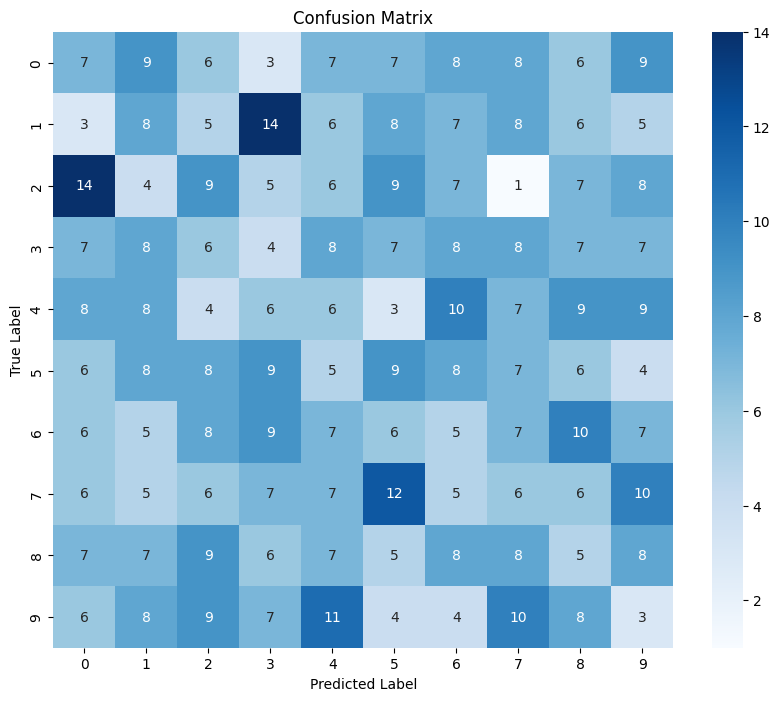

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np

y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)


accuracy = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy: {accuracy}")


conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(val_generator.class_indices.keys()),
            yticklabels=list(val_generator.class_indices.keys()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
import